# Import libraries

In [1]:
import numpy as np
import pandas as pd
import os

from decorator import append

# Read data

In [2]:
DATASET_PATH = '../../data/processed/'
DATASET_CSV_PATH = f'{DATASET_PATH}/CSV'

In [3]:
LABEL = {
    'Jump': 0,
    'Kick': 1,
    'Punch': 2,
    'Left': 3,
    'Right': 4,
    'Stand': 5
}

In [4]:
X = []
y = []

# Read all files in the dataset
for label in LABEL:
    for file in os.listdir(f'{DATASET_CSV_PATH}/Train/{label}'):
        df = pd.read_csv(f'{DATASET_CSV_PATH}/Train/{label}/{file}', sep=',')
        X.append(df)
        y.append(LABEL[label])
        # print(f"Read file: {file}")

In [5]:
# Drop first and second columns
for i, element in enumerate(X):
    X[i] = element.drop(element.columns[[0, 1]], axis=1)

In [6]:
X[0].columns

Index(['pose_0', 'pose_1', 'pose_2', 'pose_3', 'pose_4', 'pose_5', 'pose_6',
       'pose_7', 'pose_8', 'pose_9', 'pose_10', 'pose_11', 'pose_12',
       'pose_13', 'pose_14', 'pose_15', 'pose_16', 'pose_17', 'pose_18',
       'pose_19', 'pose_20', 'pose_21', 'pose_22', 'pose_23', 'pose_24',
       'pose_25', 'pose_26', 'pose_27', 'pose_28', 'pose_29', 'pose_30',
       'pose_31', 'pose_32'],
      dtype='object')

In [7]:
for i, element in enumerate(X):
    for column in element.columns:
        X[i][column] = X[i][column].apply(lambda x: np.array(x[1:-1].split(',')).astype(np.float32))

## Convert All Sequences to the Same Length

In [8]:
# Get the maximum length of all sequences
all_dim = []
for i, element in enumerate(X):
    all_dim.append(element.shape[0])
    # print(f"Element {i} shape: {np.shape(element)}, label: {y[i]}")

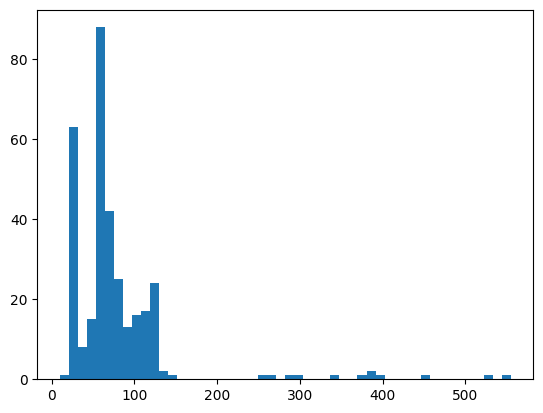

In [9]:
# Visualize the distribution of the lengths of all sequences
import matplotlib.pyplot as plt
plt.hist(all_dim, bins=50)
plt.show()

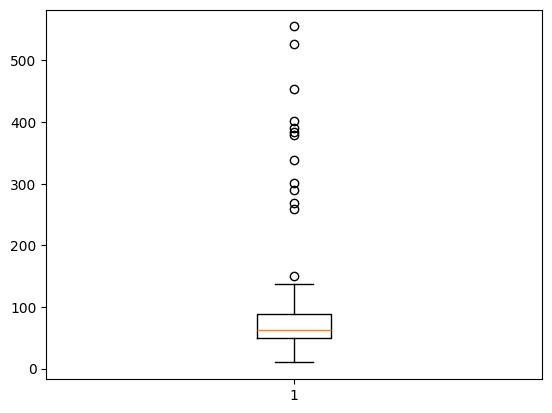

In [10]:
# Visualize the boxplot of the lengths of all sequences
plt.boxplot(all_dim)
plt.show()

### Handle the Outliers and make the lengths of all sequences the same
Handle different lengths of sequences
    Set the maximum length = 1.5 * IQR + Q3
    
    * Case 1: If e_dim < Max_dim, then increase the length of the sequence by duplicating each row until the length of the sequence is equal to Max_dim
    * Case 2: If e_dim > Max_dim, then truncate randomly the sequence until the length of the sequence is equal to Max_dim
    * Case 3: If e_dim = Max_dim, then keep the sequence as it is

In [11]:
# Convert all sequences to the same length
Q1 = np.percentile(all_dim, 25)
Q3 = np.percentile(all_dim, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Q1: 50.5, Q3: 89.0, IQR: 38.5, Lower bound: -7.25, Upper bound: 146.75


In [39]:
X[0]

,pose_0,pose_1,pose_2,pose_3,pose_4,pose_5,pose_6,pose_7,pose_8,pose_9,...,pose_23,pose_24,pose_25,pose_26,pose_27,pose_28,pose_29,pose_30,pose_31,pose_32
0,"[0.77815896, 0.21547337, -0.54420125]","[0.79176027, 0.20871603, -0.511417]","[0.79803646, 0.21171752, -0.5114372]","[0.8051426, 0.21494511, -0.51145446]","[0.77191067, 0.20417543, -0.5163067]","[0.76347595, 0.20395586, -0.5164072]","[0.7544017, 0.20410347, -0.51636314]","[0.8102292, 0.23241214, -0.33597726]","[0.7358088, 0.22035933, -0.35977277]","[0.7860084, 0.24209926, -0.48107082]",...,"[0.80889714, 0.61005926, 0.0066886484]","[0.6907873, 0.6133548, -0.006724236]","[0.825564, 0.7476105, -0.19877948]","[0.6888809, 0.76198983, -0.008365795]","[0.8018697, 0.9033618, 0.19834551]","[0.68331265, 0.9024657, 0.38628027]","[0.77994525, 0.92857265, 0.22860882]","[0.696512, 0.9243391, 0.4134521]","[0.8454588, 0.9498235, 0.04586416]","[0.66859114, 0.94860697, 0.23138717]"
1,"[0.7777351, 0.21283522, -0.54432577]","[0.79140466, 0.20507646, -0.511736]","[0.7980103, 0.2077477, -0.51175284]","[0.80515635, 0.21084026, -0.51175755]","[0.77113307, 0.20113382, -0.51668084]","[0.7628247, 0.20095122, -0.51677114]","[0.75414556, 0.20103495, -0.51674384]","[0.8113713, 0.22982891, -0.33531013]","[0.73573923, 0.21676488, -0.35969168]","[0.78599155, 0.2396628, -0.48076946]",...,"[0.80919904, 0.6085371, 0.0073540946]","[0.69084764, 0.60937154, -0.0073919827]","[0.8262323, 0.7504506, -0.07151059]","[0.68857664, 0.76167685, 0.021999981]","[0.79960066, 0.90282094, 0.3837021]","[0.68332475, 0.89965755, 0.45456848]","[0.7792241, 0.92840165, 0.41920322]","[0.6962733, 0.9217936, 0.48693523]","[0.8431648, 0.94995564, 0.23998721]","[0.6688076, 0.9468013, 0.2983186]"
2,"[0.7770132, 0.20653355, -0.5440005]","[0.7905075, 0.19882284, -0.5095292]","[0.79743123, 0.20106752, -0.50957537]","[0.80473375, 0.20399375, -0.5096024]","[0.7703709, 0.19537202, -0.51427996]","[0.7620455, 0.19507653, -0.5143711]","[0.75349003, 0.19515526, -0.5143633]","[0.81136596, 0.22262296, -0.32166618]","[0.7354248, 0.2092572, -0.3448045]","[0.7851409, 0.23255041, -0.4778173]",...,"[0.80955964, 0.6014141, 0.010295341]","[0.69089955, 0.6014427, -0.010325451]","[0.8302965, 0.7501651, -0.25074777]","[0.6877248, 0.75715315, -0.13617393]","[0.799165, 0.9029272, 0.20646179]","[0.68332666, 0.8979999, 0.2520227]","[0.77916265, 0.9284771, 0.24202247]","[0.6962041, 0.9211807, 0.27763078]","[0.84304655, 0.950788, 0.04124613]","[0.6690204, 0.946163, 0.064436264]"
3,"[0.7755938, 0.19027036, -0.54473484]","[0.7893335, 0.18175353, -0.5095547]","[0.79641527, 0.18477772, -0.50960153]","[0.80395997, 0.1884094, -0.50962937]","[0.76988727, 0.17731836, -0.5141784]","[0.7618075, 0.17677468, -0.5142719]","[0.7534188, 0.1763302, -0.5142698]","[0.81135064, 0.2079118, -0.31879526]","[0.73540455, 0.19329068, -0.33789575]","[0.7832223, 0.21621224, -0.47778076]",...,"[0.8100624, 0.58869356, 0.012150171]","[0.69098645, 0.5911422, -0.012167603]","[0.83637476, 0.74051464, -0.31640935]","[0.6874523, 0.74978507, -0.1692703]","[0.79919374, 0.8981638, 0.1319296]","[0.683327, 0.89633495, 0.21781299]","[0.77912533, 0.9249274, 0.16572927]","[0.69615895, 0.9194317, 0.24256817]","[0.8427293, 0.95078564, -0.04699912]","[0.66930556, 0.9458138, 0.018459402]"
4,"[0.77422273, 0.17576307, -0.5541646]","[0.78817904, 0.166441, -0.5165382]","[0.79542804, 0.16920322, -0.51656187]","[0.8031168, 0.17232601, -0.51658314]","[0.7689039, 0.16125323, -0.5224952]","[0.7610752, 0.16051407, -0.522594]","[0.7528924, 0.15997069, -0.52259684]","[0.8113149, 0.19137019, -0.3184833]","[0.734376, 0.1762602, -0.34095624]","[0.78186697, 0.20226648, -0.4805873]",...,"[0.81118315, 0.57383, 0.0139327245]","[0.69098794, 0.5777535, -0.0139863435]","[0.83757067, 0.7237719, -0.38626608]","[0.68690217, 0.7452947, -0.10597725]","[0.8015563, 0.89607966, -0.04376208]","[0.68300617, 0.89678544, 0.27260163]","[0.7807418, 0.92343426, -0.021075064]","[0.69610333, 0.91963166, 0.29559958]","[0.8427437, 0.951361, -0.26103

In [13]:
Max_dim = 35 

In [59]:
X_train_temp = []
Y_train_temp = []

def pad_length(ele, max_dim):
    if ele.shape[0] == max_dim:
        return ele
    
    metric_temp = []
    step = max(1, ele.shape[0] // (max_dim - ele.shape[0]))
    while len(metric_temp) != max_dim:
        for j in range(0, ele.shape[0]):
            metric_temp.append(ele.iloc[j])
            if len(metric_temp) == max_dim:
                break
            if j % step == 0:
                metric_temp.append(ele.iloc[j])
            if len(metric_temp) == max_dim:
                break
        metric_temp = pad_length(pd.DataFrame(metric_temp), max_dim)
    return pd.DataFrame(metric_temp)

def truncate_length(ele, max_dim, start=0):
    if ele.shape[0] == max_dim:
        return ele
    
    metrics_temp = []
    step = max(2, ele.shape[0] // (ele.shape[0] - max_dim))
    j = start
    while len(metrics_temp) != max_dim:
        metrics_temp.append(ele.iloc[j])
        j = j + step
    return pd.DataFrame(metrics_temp)

def pad_and_truncate(ele, max_dim):
    list_elements = np.array([])
    current_length = ele.shape[0]
    if current_length == max_dim:
        return ele
    else: 
        dev = max(int(round(current_length / max_dim)), 1)
        new_element = pad_length(ele, max_dim * dev)
        
        if new_element.shape[0] > max_dim:
            for step in range(dev):
                if list_elements.size == 0:
                    # append the first element
                    list_elements = truncate_length(new_element, max_dim, step)
                else:
                    # append the next element
                    list_elements = np.append(list_elements, truncate_length(new_element, max_dim, step), axis=0)
        else:
            if list_elements.size == 0:
                # append the first element
                list_elements = truncate_length(new_element, max_dim, step)
            else:
                # append the next element
                list_elements = np.append(list_elements, truncate_length(new_element, max_dim, step), axis=0)
    return list_elements

# Pad all sequences to the same length
for i, element in enumerate(X):
    print(f"Before padding, element {i} shape: {np.shape(element)}")
    padded_element = pad_and_truncate(element, Max_dim)
    X_train_temp.append(padded_element)
    print(f"After padding, element {i} shape: {np.shape(padded_element)}")
    print(f"After padding X_train_temp, element {i} shape: {np.shape(X_train_temp)}")


Before padding, element 0 shape: (61, 33)
After padding, element 0 shape: (70, 33)
After padding X_train_temp, element 0 shape: (1, 70, 33)
Before padding, element 1 shape: (61, 33)
After padding, element 1 shape: (70, 33)
After padding X_train_temp, element 1 shape: (2, 70, 33)
Before padding, element 2 shape: (64, 33)
After padding, element 2 shape: (70, 33)
After padding X_train_temp, element 2 shape: (3, 70, 33)
Before padding, element 3 shape: (54, 33)
After padding, element 3 shape: (70, 33)
After padding X_train_temp, element 3 shape: (4, 70, 33)
Before padding, element 4 shape: (66, 33)
After padding, element 4 shape: (70, 33)
After padding X_train_temp, element 4 shape: (5, 70, 33)
Before padding, element 5 shape: (453, 33)
After padding, element 5 shape: (455, 33)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

In [ ]:
    print(f"After padding, element {i} shape: {np.shape(padded_element)}")


In [55]:
len(X_train_temp)

327

In [114]:
X_train_temp.shape

(327, 147, 33)

In [115]:
X_train = np.full((X_train_temp.shape[0], X_train_temp.shape[1], X_train_temp.shape[2], 3), np.nan, dtype=np.float32)

for i, element in enumerate(X_train_temp):
    for j, row in enumerate(element):
        for k, value in enumerate(row):
            # Check if the value is np.array([nan, nan, nan])
            if np.isnan(value).all():
                X_train_temp[i][j][k] = np.array([np.nan, np.nan, np.nan], dtype=np.float32)
            else:
                X_train_temp[i][j][k] = value
                
            X_train[i][j][k] = X_train_temp[i][j][k][:3]

In [116]:
X_train.shape

(327, 147, 33, 3)

## Handle Fill NaN Values

### Step 1: Compute the variance of each metric for each sequence.

### Step 2: Fill NaN
   * **Case 1**: If `element[i]` doesn't have a value before, then get the value from the nearest posterior element, and adjust by adding or subtracting the variance of the metric.
   * **Case 2**: If `element[i]` doesn't have a value after, then get the value from the nearest previous element, and adjust by adding or subtracting the variance of the metric.
   * **Case 3**: If `element[i]` has values both before and after, then use the nearest previous and posterior elements:
     - For \( k < i < l \):

$$
\text{element}[i] = \text{element}[k] + (\text{element}[l] - \text{element}[k]) \times \frac{i - k}{l - k}
$$


### Step 1: Compute the variance of each metric for each sequence.

In [117]:
X_train.shape

(327, 147, 33, 3)

In [118]:
cnt = 0

In [119]:
np.nanvar(X_train[0][:, 0], axis=0)

array([1.1865508e-05, 2.1593547e-03, 6.3375747e-03], dtype=float32)

In [120]:
variance_metric = np.empty((X_train.shape[0], X_train.shape[2], 3), dtype=np.float32)
variance_metric.shape

(327, 33, 3)

In [121]:
X_train[0][:, 0].shape

(147, 3)

In [122]:
np.nanvar(X_train[1][:, 0], axis=0)

array([4.4099987e-05, 4.2892336e-03, 1.3010611e-02], dtype=float32)

In [123]:
cls_nan = dict()

for i, element in enumerate(X_train):
    sub_variance_metric = np.empty((element.shape[1], 3), dtype=np.float32)
    
    for j in range(element.shape[1]):
        variance = np.array([np.nan, np.nan, np.nan], dtype=np.float32)
        
        # If there are more than 1 non-NaN values, calculate variance
        if np.count_nonzero(~np.isnan(element[:, j])) > 1:
            variance = np.nanvar(element[:, j], axis=0)
            print(variance)
        else:
            if i not in cls_nan:
                cls_nan[i] = []
            cls_nan[i].append(j)
        # convert to list
        sub_variance_metric[j] = variance
    # print(sub_variance_metric)
    variance_metric[i] = sub_variance_metric

[1.1865508e-05 2.1593547e-03 6.3375747e-03]
[8.629708e-06 2.241837e-03 6.286422e-03]
[7.2767139e-06 2.2428248e-03 6.2828362e-03]
[6.2413546e-06 2.2458364e-03 6.2821573e-03]
[1.3330441e-05 2.2573667e-03 6.3366843e-03]
[1.6764458e-05 2.2639777e-03 6.3403659e-03]
[2.2044745e-05 2.2668084e-03 6.3391551e-03]
[3.7993625e-06 2.2131519e-03 4.6974784e-03]
[2.1308322e-05 2.2451035e-03 4.7916528e-03]
[1.0186060e-05 2.1109818e-03 5.3879921e-03]
[1.3289614e-05 2.1021890e-03 5.4945080e-03]
[4.4382773e-06 2.2064792e-03 2.0271719e-03]
[3.6489475e-06 2.2372892e-03 1.5651229e-03]
[1.6446080e-05 3.0473436e-03 3.1123313e-03]
[3.7821799e-05 2.9078792e-03 6.8800505e-03]
[8.9814803e-06 2.6132537e-03 1.1723391e-02]
[0.00021105 0.00226364 0.03320242]
[7.3948700e-06 2.6604505e-03 1.5633754e-02]
[0.00044711 0.00222805 0.04082811]
[9.03333148e-06 2.57747760e-03 1.46422675e-02]
[0.0004679  0.00222415 0.03738749]
[7.3198335e-06 2.5750280e-03 1.1781490e-02]
[0.00037917 0.00226336 0.03281865]
[2.0880067e-05 2.5190928

In [124]:
variance_metric = np.array([variance_metric], dtype=np.float32)

In [125]:
variance_metric = variance_metric.reshape(variance_metric.shape[1], variance_metric.shape[2], variance_metric.shape[3])

In [126]:
variance_metric.shape

(327, 33, 3)

In [127]:
# convert to cls_nan to pandas dataframe
cls_nan.keys()

dict_keys([])

In [128]:
LABEL

{'Jump': 0, 'Kick': 1, 'Punch': 2, 'Left': 3, 'Right': 4, 'Stand': 5}

### Step 2: Fill NaN
   * **Case 1**: If `element[i]` doesn't have a value before, then get the value from the nearest posterior element, and adjust by adding or subtracting the variance of the metric.
   * **Case 2**: If `element[i]` doesn't have a value after, then get the value from the nearest previous element, and adjust by adding or subtracting the variance of the metric.
   * **Case 3**: If `element[i]` has values both before and after, then use the nearest previous and posterior elements:
     - For \( k < i < l \):

$$
\text{element}[i] = \text{element}[k] + (\text{element}[l] - \text{element}[k]) \times \frac{i - k}{l - k}
$$


In [129]:
X_train.shape

(327, 147, 33, 3)

In [130]:
variance_metric.shape

(327, 33, 3)

In [131]:
# Function to fill NaN values based on the described cases
def fill_nan(element, variance_metric):
    old_value = None
    k = 0
    
    for i in range(element.shape[0]):
        if np.isnan(element[i]).all():
            # Case 1: If element[i] doesn't have a value before, then get the value from the nearest posterior element, and adjust by adding or subtracting the variance of the metric.
            if old_value is None:
                for l in range(i + 1, element.shape[0]):
                    if not np.isnan(element[l]).all():
                        element[i] = element[l] + abs(i - l) * variance_metric
                        break
            else:
                # Case 2: If element[i] doesn't have a value after, then get the value from the nearest previous element, and adjust by adding or subtracting the variance of the metric.
                flat = False
                for l in range(i + 1, element.shape[0]):
                    if not np.isnan(element[l]).all():
                        if l != k:
                            element[i] = old_value + (element[l] - old_value) / ((i - k) / (l - k))
                            flat = True
                            break
                if not flat:
                    # Case 3: If element[i] has values both before and after, then use the nearest previous and posterior elements
                    element[i] = old_value - abs(i - k) * variance_metric
        old_value = element[i]
    return element

In [132]:
X_train_new = np.empty(X_train.shape, dtype=np.float32)
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[2]):
        # print("Shape of element: ", X_train[i][: , j].shape)
        # print("Shape of variance: ", variance_metric[i][j].shape)
        X_train_new[i][: , j] = fill_nan(X_train[i][: , j], variance_metric[i][j])

In [133]:
np.isnan(np.array([np.nan, np.nan, 0])).sum()

2

In [134]:
variance_metric[0][2]

array([7.2767139e-06, 2.2428248e-03, 6.2828362e-03], dtype=float32)

In [135]:
# Drop data with NaN values
drop_index = list(cls_nan.keys())
# Drop data in X_train_new that has index in drop_index
X_train_new = np.delete(X_train_new, drop_index, axis=0)
y_train = np.delete(y_train, drop_index, axis=0)

In [136]:
y_train.shape

(327,)

In [137]:
X_train_new.shape

(327, 147, 33, 3)

In [138]:
# Save the processed data
np.save('X_train.npy', X_train_new)
np.save('y_train.npy', y_train)

In [139]:
import numpy as np
# Load the processed data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

In [140]:
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[2]):
        if np.isnan(X_train[i][:, j]).sum() > 0:
            print(f"Element {i}, Metric {j}, NaN: {np.isnan(X_train[i][:, j]).sum()}")

## LSTM model LSTM model

In [141]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [142]:
import tensorflow as tf
# check version
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

2.16.1


In [143]:
print("GPUs available:", len(tf.config.list_physical_devices('GPU')))

GPUs available: 1


In [144]:
!nvidia-smi

Mon Oct  7 15:24:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.06             Driver Version: 535.183.06   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     On  | 00000000:01:00.0  On |                  N/A |
| 30%   42C    P8              18W / 200W |   7964MiB /  8192MiB |      9%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [145]:
X_train.shape

(327, 147, 33, 3)

In [146]:
# Reshape the data
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2] * X_train.shape[3])

In [147]:
# Define LSTM model
model = keras.models.Sequential() 
model.add(Bidirectional(LSTM(1024, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.5))  # Dropout rate reduced
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(len(LABEL), activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

2024-10-07 15:24:13.039203: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-07 15:24:13.039328: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-07 15:24:13.039378: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

InternalError: cudaSetDevice() on GPU:0 failed. Status: out of memory

In [20]:
y_train.shape

(308,)

In [21]:
# divide validation set and train set
from sklearn.model_selection import train_test_split
X_train_reshaped, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=42)

In [24]:
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3049 - loss: 1.6485 - val_accuracy: 0.3226 - val_loss: 1.5720
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3415 - loss: 1.6556 - val_accuracy: 0.3226 - val_loss: 1.5653
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3130 - loss: 1.6626 - val_accuracy: 0.3226 - val_loss: 1.5592
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3496 - loss: 1.6068 - val_accuracy: 0.3226 - val_loss: 1.5547
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3780 - loss: 1.5933 - val_accuracy: 0.3226 - val_loss: 1.5520
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3780 - loss: 1.5518 - val_accuracy: 0.3226 - val_loss: 1.5483
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3415 - loss: 1.6157 - val_accuracy: 0.3226 - val_loss: 1.5454
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3374 - loss: 1.5837 - val_accuracy: 0.3226 - val_loss: 1.5415
Epoch 9/

In [ ]:
# Save the model
model.save('model.h5')

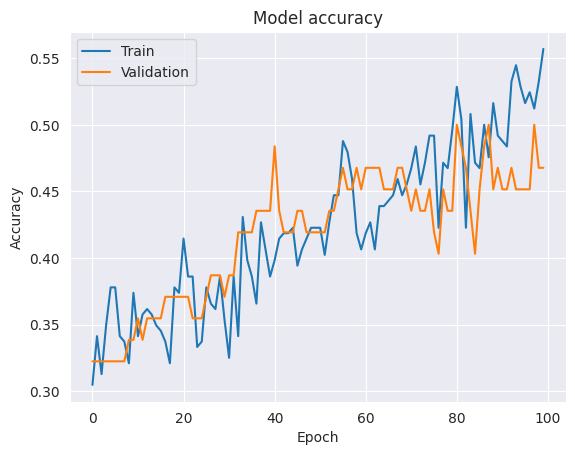

In [25]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
# Metrics
model.evaluate(X_train_reshaped, y_train)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.6398 - loss: 1.0917


[1.1036224365234375, 0.6260162591934204]

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step


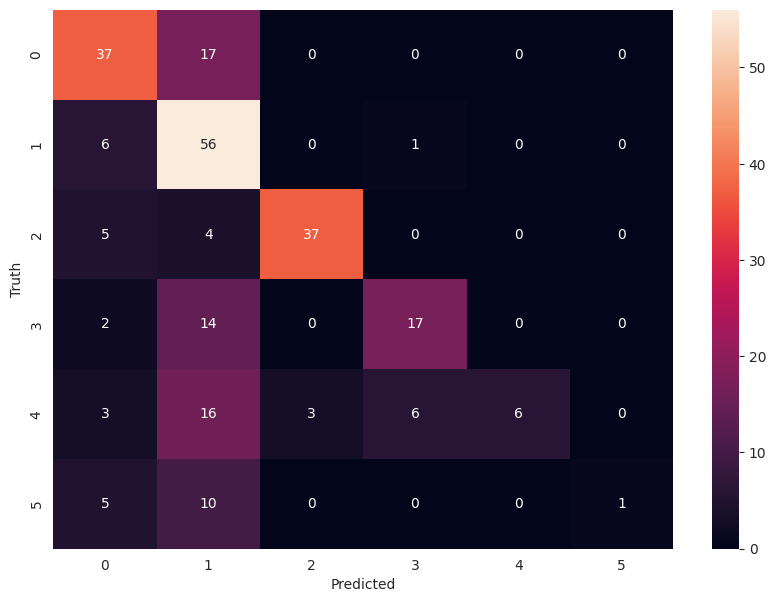

In [28]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_train_reshaped)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [63]:
LABEL

{'Jump': 0, 'Kick': 1, 'Punch': 2, 'Left': 3, 'Right': 4, 'Stand': 5}